In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
##I have an audio file and the annotation is in another excel file so lets segregate toxic parts
import pandas as pd
import os
import numpy as np

In [15]:
df = pd.read_excel('/kaggle/input/test-xl/testaudio.xlsx')

In [16]:
df.head()

,angry_011,117,21,38,17
0,angry_011,117,40,55,15
1,angry_011,117,60,79,19
2,angry_011,117,85,95,10
3,angry_011,117,101,110,9


In [26]:
from pydub import AudioSegment

for row in df.values:
    t1 = 1000 * row[2]
    t2 = 1000 * row[3]
    audio  = AudioSegment.from_wav('/kaggle/input/test-audio/angry_011.wav')
    toxic = audio[t1:t2]
    toxic.export(os.path.join('/kaggle/working/',str(row[2])+".wav"))

In [1]:
import librosa

In [30]:
audio, sr = librosa.load('/kaggle/working/101.wav')

In [43]:
print(sr)
print(audio.shape)
#this audio is the samples created from the audio. Here sample rate is 22050 meaning for 
#each second of audio there will be 22050 samples.
#thus 198450 = 22050x9

22050
(198450,)


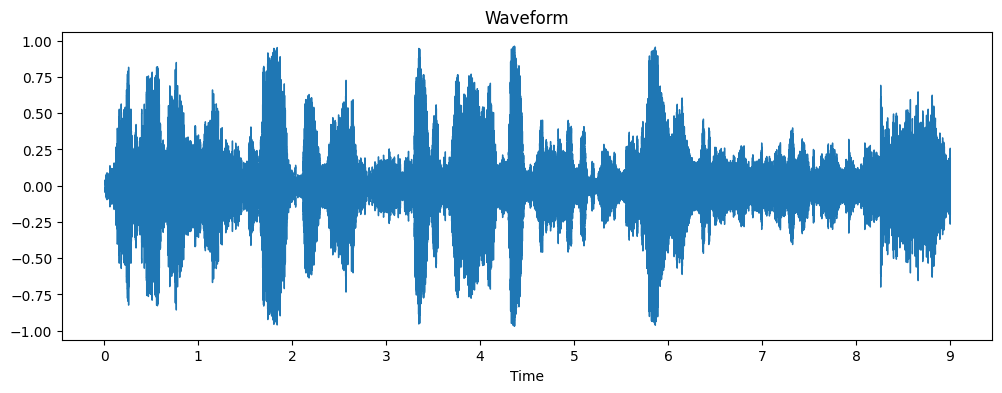

In [45]:
import librosa.display
import matplotlib.pyplot as plt
# Set the figure size for the plot
plt.figure(figsize=(12, 4))

# Display the waveform
librosa.display.waveshow(audio, sr=sr)

# Set the title of the plot
plt.title('Waveform')

# Show the plot
plt.show()

In [34]:
mel_spec = librosa.feature.melspectrogram(y=audio,sr =sr)

In [35]:
mel_spec

array([[1.80390000e-01, 6.22815549e-01, 5.75145364e-01, ...,
        3.58379781e-01, 3.96426857e-01, 2.05083513e+00],
       [1.31243110e+00, 8.55915451e+00, 5.58409691e+00, ...,
        9.58403206e+00, 7.26229286e+00, 6.79476452e+00],
       [2.59477472e+00, 1.13160582e+01, 3.97269273e+00, ...,
        8.51409817e+00, 1.54505262e+01, 7.89848375e+00],
       ...,
       [7.33747584e-06, 3.02637309e-05, 9.39254824e-05, ...,
        2.08665024e-05, 1.20135355e-05, 1.55775160e-05],
       [9.56494659e-06, 2.32418388e-05, 2.76606843e-05, ...,
        2.07530229e-06, 1.61254616e-06, 1.07740962e-05],
       [4.78345373e-06, 8.75278511e-06, 1.62349647e-06, ...,
        3.15661941e-09, 1.87450524e-07, 6.62578577e-06]], dtype=float32)

In [36]:
mel_spec.shape

(128, 388)

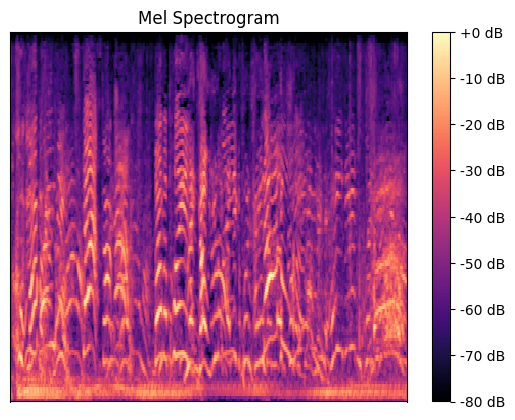

In [46]:
# Display the Mel spectrogram in decibels
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max))

# Add a colorbar to the plot
plt.colorbar(format='%+2.0f dB')

# Set the title of the plot
plt.title('Mel Spectrogram')

# Show the plot
plt.show()

In [106]:
#There is probably not much visible difference but lets just see what type of melspec we see for non toxic audio 
aud  = AudioSegment.from_wav('/kaggle/input/test-audio/angry_011.wav')
normal = aud[9000:18000]
normal.export(os.path.join('/kaggle/working/','normal'+".wav"))

<_io.BufferedRandom name='/kaggle/working/normal.wav'>

In [83]:
##Lets create a function so that its easy to automate the process
def audio_exp(audio_path):
    audio1, sr1 = librosa.load(audio_path)
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)

    # Display the waveform
    librosa.display.waveshow(audio, sr=sr)

    # Set the title of the plot
    plt.title('Waveform')

    # Show the plot
    plt.show()
    
    plt.subplot(2, 1, 2)

    mel_spec1 = librosa.feature.melspectrogram(y=audio1,sr =sr1)

    # Display the Mel spectrogram in decibels
    im = librosa.display.specshow(librosa.power_to_db(mel_spec1, ref=np.max))

    # Add a colorbar to the plot
    plt.colorbar(im, format='%+2.0f dB')

    # Set the title of the plot
    plt.title('Mel Spectrogram')


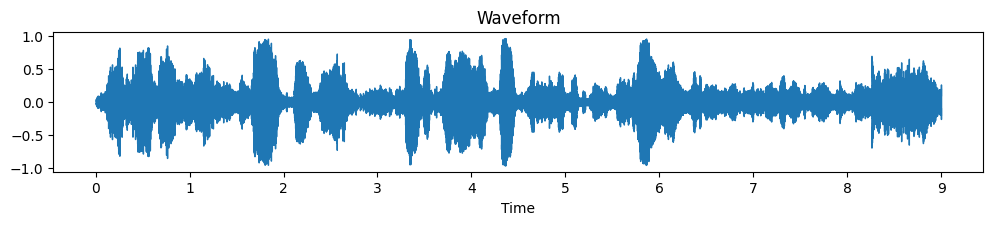

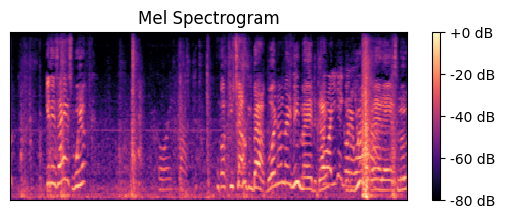

In [84]:
audio_path = '/kaggle/working/normal.wav'
audio_exp(audio_path)

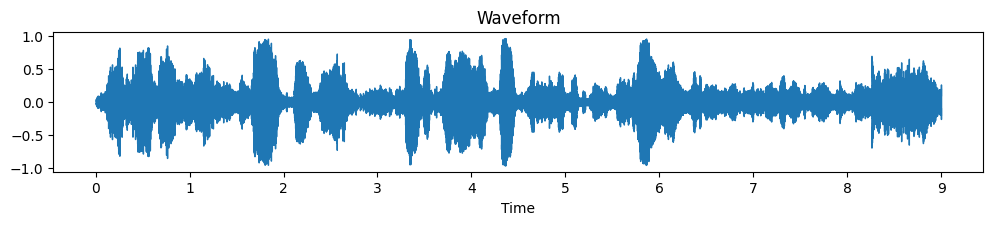

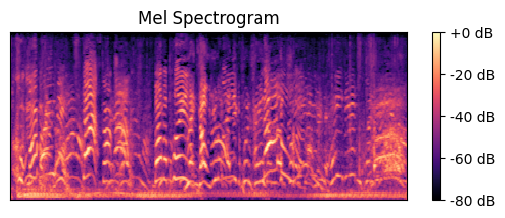

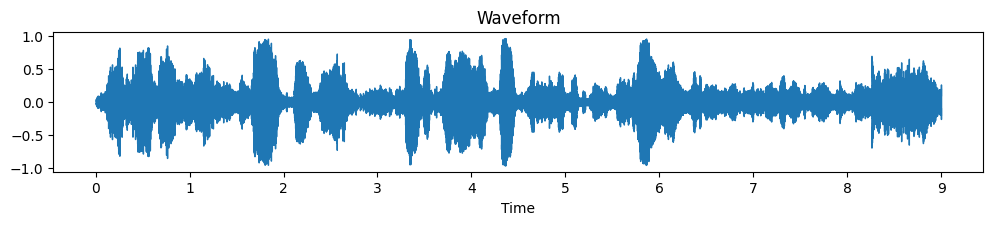

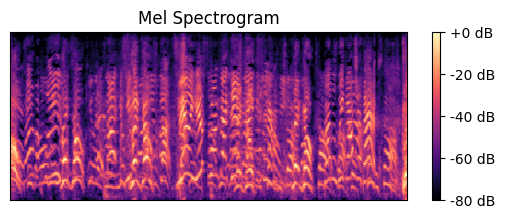

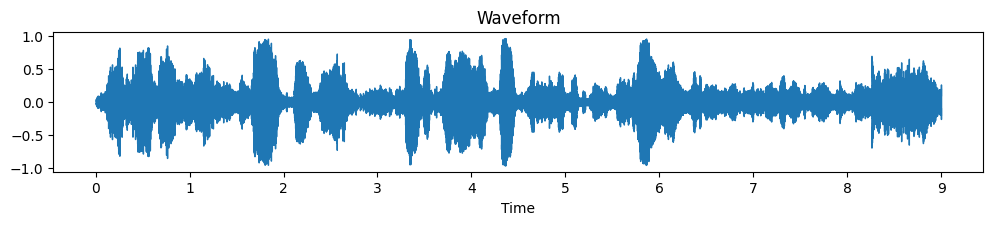

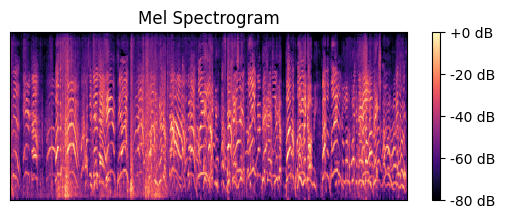

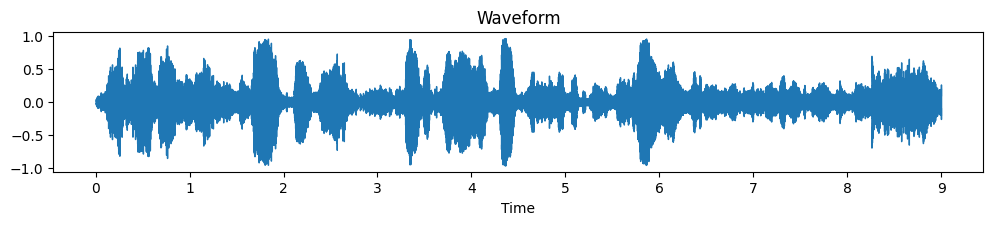

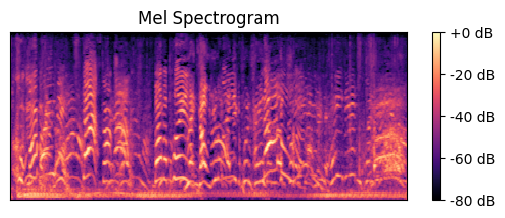

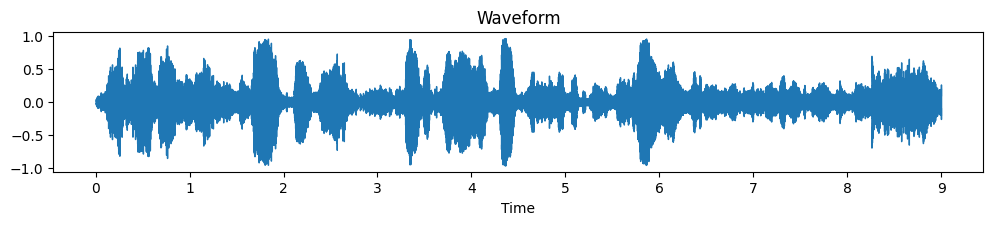

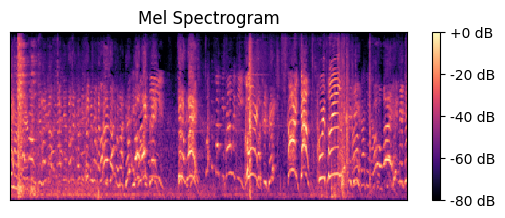

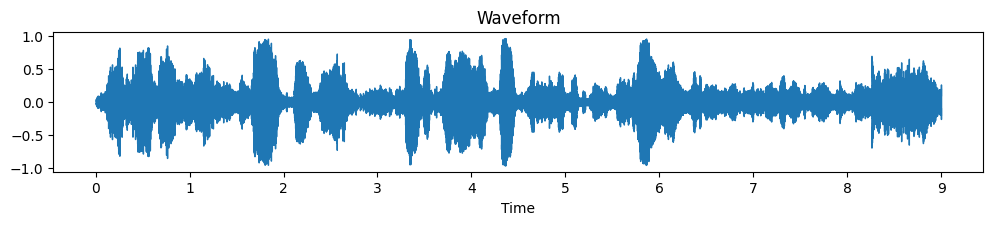

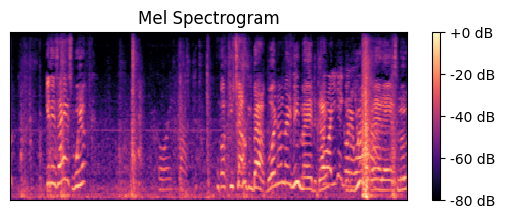

In [85]:
for file in os.listdir('/kaggle/working/'):
    if os.path.isfile(os.path.join('/kaggle/working/', file)):
        audio_exp(file)

In [86]:
# you do see some visible differences but that might be mere coincedence

In [88]:
#Lets try another one
#There is probably not much visible difference but lets just see what type of melspec we see for non toxic audio 
aud  = AudioSegment.from_wav('/kaggle/input/test-audio/angry_011.wav')
normal = aud[18000:27000]
normal.export(os.path.join('/kaggle/working/','normal1'+".wav"))

<_io.BufferedRandom name='/kaggle/working/normal1.wav'>

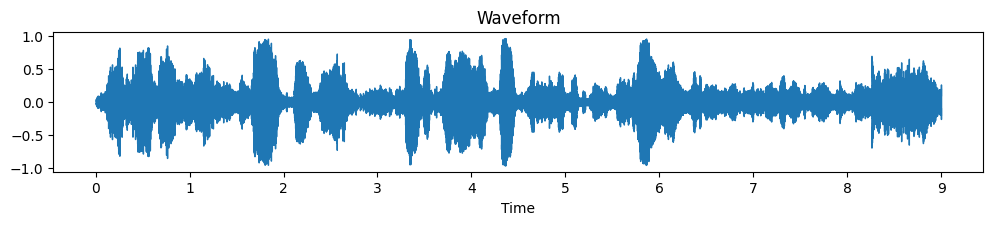

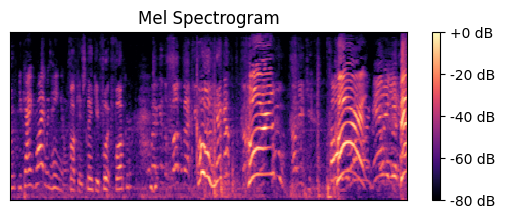

In [90]:
audio_exp('/kaggle/working/normal1.wav')

In [91]:
#You see lot less variations in these mel spectograms

In [92]:
## The next exploration we will do is cleaning the audio. This might or 
#mightnot be helpful to the model since most of the audio
#that contains rage automatically distorts which can help create a pattern but still lets see the possibilities

In [95]:
from IPython.display import Audio, IFrame, display

display(Audio(audio,rate=sr))